# Activation Functions

> **Author**: Gustavo Leite, **Date**: 2022-01-28

Plot several functions commonly used as activation in Deep Learning models.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(*fns, xlim=(-5, 5), ylim=None):
    """Plot a list of functions that take a single parameter `x`."""
    
    def prepare(fig, ax):
        fig.patch.set_facecolor('white')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.axhline(y=0, color='k', lw=1.0, alpha=0.3)
        ax.axvline(x=0, color='k', lw=1.0, alpha=0.3)
        ax.grid(which='major', c='white')
        ax.set_facecolor('#f0f0f0')
        if ylim:
            ax.set_ylim(ylim)
        
    def is_prime(fn):
        return fn.__name__.endswith('prime')
    
    x = np.linspace(xlim[0], xlim[1], 1000)
    fig, ax = plt.subplots()
    prepare(fig, ax)
    
    for fn in fns:
        if not is_prime(fn):
            color, line, lw = 'steelblue', '-', 2.0
        else:
            color, line, lw = 'goldenrod', '--', 2.0
        ax.plot(x, fn(x), line, lw=lw, color=color)

## Sigmoid

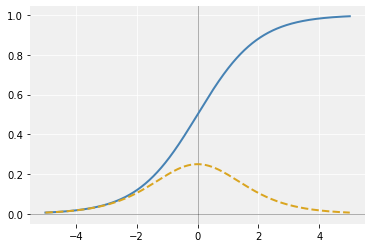

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

plot(sigmoid, sigmoid_prime)

## Tanh

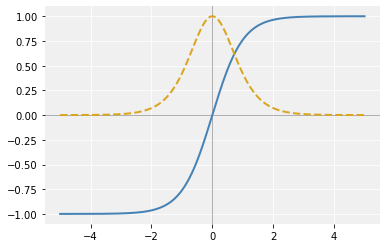

In [4]:
def tanh(x):
    return 2 * sigmoid(2 * x) - 1

def tanh_prime(x):
    return 1 - tanh(x) ** 2

plot(tanh, tanh_prime)

## ReLU: Rectified Linear Unit

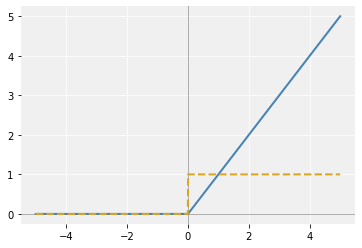

In [5]:
def relu(x):
    return np.maximum(0.0, x)

def relu_prime(x):
    return np.where(x > 0, 1.0, 0.0)

plot(relu, relu_prime)

## Leaky ReLU

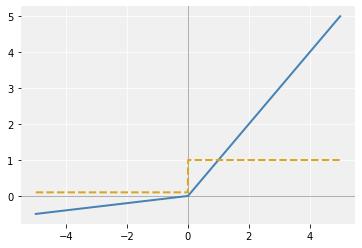

In [6]:
def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha * x, x)

def leaky_relu_prime(x, alpha=0.1):
    return np.where(x > 0, 1.0, alpha)

plot(leaky_relu, leaky_relu_prime)

## ELU: Exponential Linear Unit

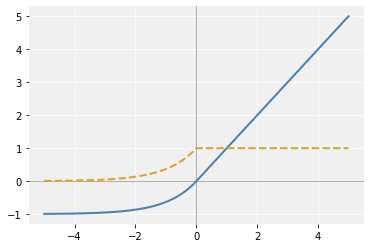

In [7]:
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_prime(x, alpha=1.0):
    return np.where(x > 0, 1.0, alpha * np.exp(x))
    
plot(elu, elu_prime)

## ReLU6

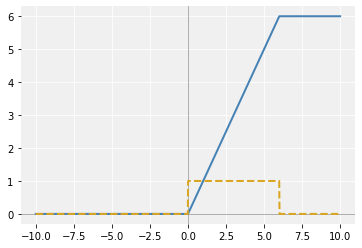

In [8]:
def relu6(x):
    return np.minimum(np.maximum(0.0, x), 6.0)

def relu6_prime(x):
    return np.where((x > 0) & (x <= 6), 1.0, 0.0)

plot(relu6, relu6_prime, xlim=(-10, 10))

## Swish

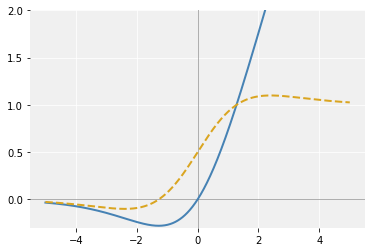

In [9]:
def swish(x, beta=1.0):
    return x * sigmoid(beta * x)

def swish_prime(x, beta=1.0):
    return swish(x, beta) + sigmoid(x) * (1 - swish(x, beta))

plot(swish, swish_prime, ylim=(-0.3, 2))

## Hard Swish

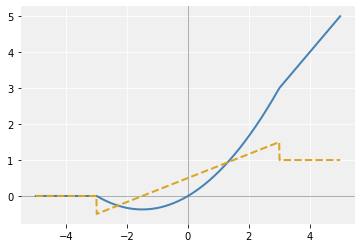

In [10]:
def hard_swish(x, beta=1.0):
    return x * (relu6(x + 3) / 6)

def hard_swish_prime(x, beta=1.0):
    return np.where(
        (x >= -3) & (x <= 3),
            (2*x + 3)/6,
            np.where(x > 0, 1.0, 0.0))

plot(hard_swish, hard_swish_prime)

## SoftMax

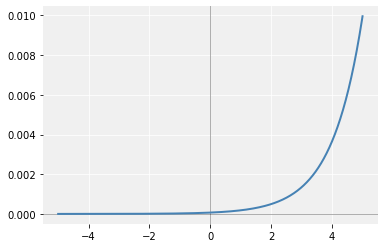

In [11]:
def softmax(x):
    e = np.exp(x - np.max(x))
    return e / np.sum(e)

def softmax_prime(x):
    raise NotImplementedError()
    
plot(softmax)